# **Can Amazon Translate Identify Native and Non-Native Speakers?**


As Machine Learning (ML) has quickly developed and is now widely-used in our society, machines are increasingly able to complete a variety of tasks that are typically done manually by humans.  We can easily think of the application of machine translators in daily life, ranging from formal assignments to simple written tasks. But still, people are wondering whether it is reliable to use ML translators for nuanced translations. For instance, can we use them in real-time while chatting with a foreigner on a messaging platform? To read foreign language materials, like poetry and other language-specific texts? How about in an academic setting to help with our language homework?

In this notebook, we'll walk through some samples to test the reliability of [Amazon Translate](https://aws.amazon.com/translate/) and provide a concrete analysis with quantified and visualized data. Ultimately, we aim to determine to what extent this ML service could be used to feign native proficiency in a new language. We start with an overview of how we define the quality of a translated work by ML translators, explain how we test on that, and then discuss how you can use Amazon Translate on websites or apply it in other places based on your own requisite.

## **Amazon Translate Efficiency and Accuracy Test Overview**

We want to provide you some suggestions using Amazon Translate for certain works through our test on its efficiency and accuracy. Further, we want to know what factors would influence the quality of translation, for instance, sentence structure and syntax. Thus, we check through translated results from native and non-native speakers of languages. That is, we would take writing samples from languages we speak that are not our native languages (source language) and translate them into our native language (target language) using Amazon Translate. Then, we would take another document which is written by the source language native speakers into our native language. Then we would compare the two translated writing samples to see if either of them is more readable or grammatically correct, etc. 

One example of our hypothesis would be: when a person who speaks English natively writes in Spanish, he or she might inadvertently use more English sentence structure or grammatical conventions, which makes the translating process easier and more accurate. Though, since any ML tool has to be trained using large amount of data, it may also be the case that Amazon Translate is built on many specific written examples from both the source and target language which minimize the "hiccups" or errors in the translation.

## **Metrics for Testing**

We set two metrics to test the efficiency and accuracy of the translation result.

Here, we use another helper services from AWS: Amazon Comprehend  


> "Amazon Comprehend is a natural language processing (NLP) service that uses machine learning to find insights and relationships in text. We can use Amazon Comprehend to examine text to determine the dominant language, detect entities (such as people, places, and commercial items), key phrases(a string containing a noun phrase that describes a particular thing), and the sentiment (such as positive, negative, neutral, or mixed) of the source text."




We would use that to test how efficiency it is using Amazon Translate to translate text. For instance, whether we could successfully convey important messages through ML translation.
Since we can extract key information from text using Amazon Comprehend, we would firstly apply that to our source text, taking key messages from that. Next, we would translate the source text into target languages using Amazon Translate. After that, we would apply Amazon Comprehend again to the translated result and translate the extracted key information back to the source language. Then, we compare two results of extracted information by calculating the difference percentage:


> Number of different key info / Total number of key info = Difference percentage



We want to show to what extent the Amazon Translation process would retain the key information in the text. From both the aspect of daily life and formal situations, this could be important from a comprehensive perspective whether key messages are able to be conveyed.


Additionally, we are also applying a helper function from Python to check the grammar of translated text using the LanguageTool.

> This is a simple tool in Python that could be used to check basic grammar errors of source text. Errors, such as misspelled words or incorrect agreement between verbs and nouns should be caught by the **grammar_check** package. 

To read more about this package and its uses, visit the creator's [GitHub](https://github.com/myint/language-check).

We would use it to check the grammar and then count the number of errors detected. Next, we calculate the error percentage by the formula:

> Number of error / Total word count = Error percentage



We want to show to what extent it is proper to use Amazon Translator for more formal assignments. For instance, if you need to submit a scientific paper, you might want it to be more grammatically correct, especially when dealing with technical terms and procedures for which language must be precise.

Eventually, we would visualize the efficiency and accuracy of the translation result based on those data. According to the article  [An Evaluation of Output Quality of Machine Translation Program](https://www.aclweb.org/anthology/R09-2013.pdf) by Mitra Shahahbi, a method is introduced to quantify the quality of translation.


> For measurement, a score of 10 is set: 5 for accuracy and 5 for intelligibility. Different weights would be assigned to referential meaning, grammatical meaning, grammaticality, and fluency. Points are deducted due to the number of errors made.


We refer to this method as a measurement in our testing while comparing results from different samples. That is, we would provide an assessment of the translation quality based on both comprehensive and grammar aspects. To be specific, we set a score of total word count as the base score. Next, we deduct points from it: 2 points for comprehensive and 1 point for grammar. (This is because we deem the comprehensive aspect to be more important for both casual and formal uses, while grammarly correct is more important for formal uses.) Then, we get a percentage by the formula:


> Result point / Original point  = Point Percentage

Which is the quantified quality of the translation result.




## **Specific Test Procedures (including codes)**


Here we are using an example of translating English to Chinese by a non-native Chinese speaker. We will go through several steps including using AWS Comprehend to help with the analysis. The stpes are as followed:

##1. Read the translated text out loudly by Amazon Polly

Preparation:

In [ ]:
import boto3 
import IPython.display as ipd
import pandas as pd
import json
import s3fs
import matplotlib.pyplot as plt
client = boto3.client("polly")
comprehend = boto3.client(service_name='comprehend', region_name='us-east-1')

In [ ]:
def read_txt(name):
    with open(name)as f:
        contents = f.read()
    return contents

In [ ]:
English_text = read_txt(sample1)

Define the function for text reading.

In [ ]:
def textToVoice(txt,lan_code, accent):
    response = client.synthesize_speech(Text=txt,LanguageCode = lan_code, OutputFormat="mp3",VoiceId=accent)
    file = open(f'speech-{accent}-{lan_code}.mp3','wb')
    file.write(response['AudioStream'].read())
    file.close()
    return f'speech-{accent}-{lan_code}.mp3'

Apply that function and set the language as well as the accent. 
(For specific language and accent that could be applied, please check out [here](https://console.aws.amazon.com/polly/home/SynthesizeSpeech).)

In [ ]:
textToVoice(English_text,language1,accent1)

'speech-Joanna-en-US.mp3'

Use the following line to play the audio.

In [ ]:
ipd.Audio(filename='speech-Joanna-en-US.mp3')

We use this to get fluency of the language.

##2. Translate text to target language.

Create a bucket.

In [ ]:
! aws s3 mb s3://contadina-project-xiuyiqian

make_bucket: contadina-project-xiuyiqian


In [ ]:
tran_json(sample1)

'sample1.json'

Write the source text in form of json and translate that by AWS Traslate. For specific details please refer to "**Deloying Amazon Translate**" part in this blog.

In [ ]:
!echo '{"Text": "Hello! I just saw this WeChat you sent me. I almost cried and I was moved to see that you liked my class so much. This is the first time I am teaching classes in a not my own school so you guys are my first boxing class. Teaching you is my most honored event in China this time. Wait, I just said this Chinese, right? Haha I am also learning Chinese myself, so it is a little difficult to write Chinese. But what I want to say is that I always thought it was a very happy thing to teach you. Everyone was so hard and I felt that our class students were the best wlsa. I know you all graduated right away in grade 12, so you have fewer chances to see. But all right, like I said last time, our boxing community is different from them. We are a family, and I am sure you will come together in the future. We also meet!",  "SourceLanguageCode": "en",  "TargetLanguageCode": "zh" }' > translate_zh.json

In [ ]:
!aws translate translate-text \
            --region us-east-1 \
            --cli-input-json file://translate_zh.json > translated_zh.json
!cat translated_zh.json

{
    "TranslatedText": "你好！我刚看见你发给我的这个微信。我差点哭了，我感动地看到你非常喜欢我的课。这是我第一次在不是自己的学校教课，所以你们是我的第一个拳击课。教你是这次我在中国最荣幸的活动。等等，我刚说过这个中国人，对吧？哈哈我自己也在学汉语，所以写中文有点困难。但是我想说的是，我一直认为教你是一件非常开心的事。每个人都很难，我觉得我们的班级学生是最好的 wlsa。我知道你们都马上在 12 年级毕业，所以你看见的机会就减少了。但是好吧，就像我上次说的那样，我们的拳击社区与他们不同。我们是一个家庭，我相信你将来会聚在一起。我们也见面了！",
    "SourceLanguageCode": "en",
    "TargetLanguageCode": "zh"
}


In [ ]:
load_zh = open('translated_zh.json')
data_zh = json.load(load_zh)
Chinese_text = data_zh['TranslatedText']

FileNotFoundError: ignored

##3. Put the translated text to AWS comprehend to find insight and relationships in text.

## Language Detection

We can use Amazon Comprehend to examine text to determine the dominant language. The response includes a score that indicates the confidence level that Amazon Comprehend has that a particular language is the dominant language in the document.

In [ ]:
print('Calling DetectDominantLanguage')
print(json.dumps(comprehend.detect_dominant_language(Text = English_text), sort_keys=True, indent=4))
print("End of DetectDominantLanguage\n")

Calling DetectDominantLanguage
{
    "Languages": [
        {
            "LanguageCode": "en",
            "Score": 0.9978402256965637
        }
    ],
    "ResponseMetadata": {
        "HTTPHeaders": {
            "content-length": "64",
            "content-type": "application/x-amz-json-1.1",
            "date": "Fri, 23 Apr 2021 08:52:24 GMT",
            "x-amzn-requestid": "a20d1bf7-ef18-44b9-82ea-410ead4a8abc"
        },
        "HTTPStatusCode": 200,
        "RequestId": "a20d1bf7-ef18-44b9-82ea-410ead4a8abc",
        "RetryAttempts": 0
    }
}
End of DetectDominantLanguage



In [ ]:
print('Calling DetectTranslatedLanguage')
print(json.dumps(comprehend.detect_dominant_language(Text = Chinese_text), sort_keys=True, indent=4))
print("End of DetectTranslatedLanguage\n")

Calling DetectTranslatedLanguage
{
    "Languages": [
        {
            "LanguageCode": "zh",
            "Score": 0.9700854420661926
        }
    ],
    "ResponseMetadata": {
        "HTTPHeaders": {
            "content-length": "64",
            "content-type": "application/x-amz-json-1.1",
            "date": "Fri, 23 Apr 2021 08:52:24 GMT",
            "x-amzn-requestid": "abde3c86-f6ef-43f5-9c03-56084b19de85"
        },
        "HTTPStatusCode": 200,
        "RequestId": "abde3c86-f6ef-43f5-9c03-56084b19de85",
        "RetryAttempts": 0
    }
}
End of DetectTranslatedLanguage





1. Translate text to target language
2. Read the translated text out loud by Amazon Polly (if you want to train your listening by the way!)
3. Put the translated text to AWS comprehend to find insight and relationships in text
4. Compare that to original language comprehend result, check if there’s anything lost due to translation---efficiency
5. Use grammar check for translated text, set a score and deduct points from it based on grammar mistakes caught---accuracy








## Architecture Diagram

The following shows the various AWS services that were utlizied in this project, including Amazon S3, a bucket storage feature, and SageMaker, the primary tool for training and deploying machine learning model on AWS. Within an EC2 t3 instance, the jupyter notebook was hosted and the command line interface was used to transform data, pass it through Amazon translation, and get a look at simple metrics.

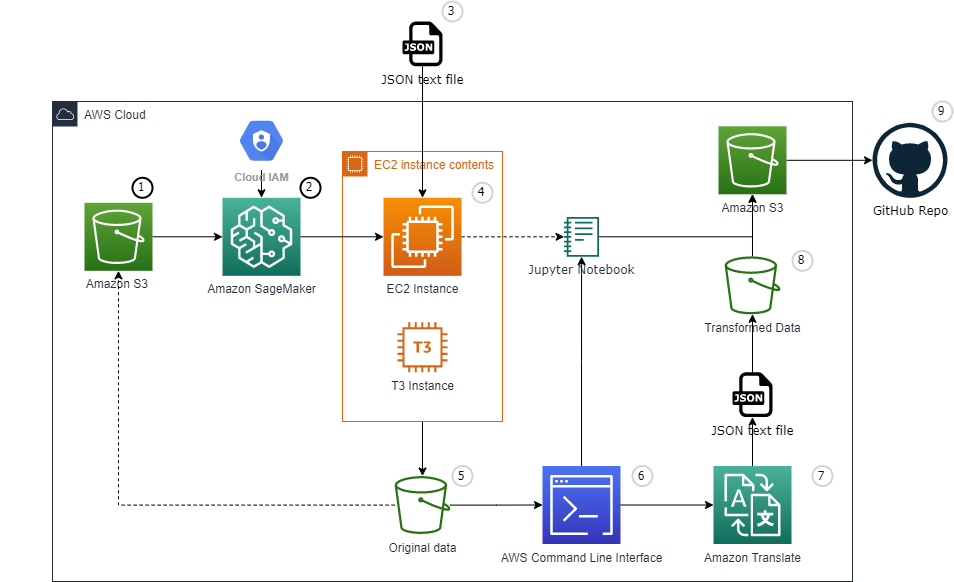

## Detect Entities

We can also detect entities in a document. An entity is a textual reference to the unique name of a real-world object such as people, places, and commercial items, and to precise references to measures such as dates and quantities.Each entity also has a score that indicates the level of confidence that Amazon Comprehend has that it correctly detected the entity type.

In [ ]:
entities_en_df = pd.DataFrame()
entities_zh_df = pd.DataFrame()

In [ ]:
print('Calling English-version DetectEntities')
entities_en = json.dumps(comprehend.detect_entities(Text=English_text, LanguageCode='en'), sort_keys=True, indent=4)
print(entities_en)
print('End of English-version DetectEntities\n')

Calling English-version DetectEntities
{
    "Entities": [
        {
            "BeginOffset": 23,
            "EndOffset": 29,
            "Score": 0.6094892621040344,
            "Text": "WeChat",
            "Type": "ORGANIZATION"
        },
        {
            "BeginOffset": 126,
            "EndOffset": 136,
            "Score": 0.9447324872016907,
            "Text": "first time",
            "Type": "QUANTITY"
        },
        {
            "BeginOffset": 201,
            "EndOffset": 206,
            "Score": 0.9675905108451843,
            "Text": "first",
            "Type": "QUANTITY"
        },
        {
            "BeginOffset": 262,
            "EndOffset": 267,
            "Score": 0.995296061038971,
            "Text": "China",
            "Type": "LOCATION"
        },
        {
            "BeginOffset": 302,
            "EndOffset": 309,
            "Score": 0.8708974719047546,
            "Text": "Chinese",
            "Type": "OTHER"
        },
        {
     

In [ ]:
with open("en-text.json", "w") as outfile:
    outfile.write(entities_en)
load_en = open('en-text.json')
data_en = json.load(load_en)

In [ ]:
en_text_list = []
en_type_list = []
for entities in data_en['Entities']:
    en_text_list.append(entities['Text'])
    en_type_list.append(entities['Type']) 
entities_en_df['text'] = en_text_list
entities_en_df['type'] = en_type_list

In [ ]:
print('Calling Chinese-version DetectEntities')
entities_zh = json.dumps(comprehend.detect_entities(Text=Chinese_text, LanguageCode='zh'), sort_keys=True, indent=4)
print(entities_zh)
print('End of Chinese-version DetectEntities\n')

Calling Chinese-version DetectEntities
{
    "Entities": [
        {
            "BeginOffset": 41,
            "EndOffset": 44,
            "Score": 0.9956773519515991,
            "Text": "\u7b2c\u4e00\u6b21",
            "Type": "QUANTITY"
        },
        {
            "BeginOffset": 62,
            "EndOffset": 68,
            "Score": 0.9541299939155579,
            "Text": "\u7b2c\u4e00\u4e2a\u62f3\u51fb\u8bfe",
            "Type": "QUANTITY"
        },
        {
            "BeginOffset": 76,
            "EndOffset": 78,
            "Score": 0.995897650718689,
            "Text": "\u4e2d\u56fd",
            "Type": "LOCATION"
        },
        {
            "BeginOffset": 94,
            "EndOffset": 97,
            "Score": 0.7375438213348389,
            "Text": "\u4e2d\u56fd\u4eba",
            "Type": "OTHER"
        },
        {
            "BeginOffset": 109,
            "EndOffset": 111,
            "Score": 0.9631769061088562,
            "Text": "\u6c49\u8bed",
    

In [ ]:
with open("zh-text.json", "w") as outfile:
    outfile.write(entities_zh)
load_zh = open('zh-text.json')
data_zh = json.load(load_zh)

In [ ]:
zh_text_list = []
zh_type_list = []
for entities in data_zh['Entities']:
    zh_text_list.append(entities['Text'])
    zh_type_list.append(entities['Type']) 
entities_zh_df['text'] = zh_text_list
entities_zh_df['type'] = zh_type_list


In [ ]:
entities_en_df

,text,type
0,WeChat,ORGANIZATION
1,first time,QUANTITY
2,first,QUANTITY
3,China,LOCATION
4,Chinese,OTHER
5,Chinese,OTHER
6,Chinese,OTHER
7,grade 12,OTHER


In [ ]:
entities_zh_df

,text,type
0,第一次,QUANTITY
1,第一个拳击课,QUANTITY
2,中国,LOCATION
3,中国人,OTHER
4,汉语,OTHER
5,中文,OTHER
6,一件非常开心的事,QUANTITY
7,个人,QUANTITY
8,12 年级,QUANTITY
9,上次,DATE


Through the comparison, to our surprise, the Chiense version actually has detected more entities--9 entities vs 7 entities-- with even higher accuracy.
The Chinese Comprehension part defined each event as a quantity.

## Detect Key Phrases

We can use Amazon Comprehend operations to find key phrases in your document.A key phrase is a string containing a noun phrase that describes a particular thing. It generally consists of a noun and the modifiers that distinguish it. Each key phrase includes a score that indicates the level of confidence that Amazon Comprehend has that the string is a noun phrase. We can use the score to determine if the detection has high enough confidence for your application.

In [ ]:
print('Calling English-Version DetectKeyPhrases')
key_en = json.dumps(comprehend.detect_key_phrases(Text=English_text, LanguageCode='en'), sort_keys=True, indent=4)
print(key_en)
print('End of English-Version DetectKeyPhrases\n')

Calling English-Version DetectKeyPhrases
{
    "KeyPhrases": [
        {
            "BeginOffset": 18,
            "EndOffset": 29,
            "Score": 0.9999933242797852,
            "Text": "this WeChat"
        },
        {
            "BeginOffset": 96,
            "EndOffset": 104,
            "Score": 0.9999998807907104,
            "Text": "my class"
        },
        {
            "BeginOffset": 122,
            "EndOffset": 136,
            "Score": 0.9999994039535522,
            "Text": "the first time"
        },
        {
            "BeginOffset": 151,
            "EndOffset": 158,
            "Score": 0.9997197985649109,
            "Text": "classes"
        },
        {
            "BeginOffset": 162,
            "EndOffset": 181,
            "Score": 0.9541907906532288,
            "Text": "a not my own school"
        },
        {
            "BeginOffset": 185,
            "EndOffset": 193,
            "Score": 0.9965958595275879,
            "Text": "you guys"
  

In [ ]:
with open("en-key.json", "w") as outfile:
    outfile.write(key_en)
load_key_en = open('en-key.json')
data_key_en = json.load(load_key_en)

classify the score and find out the distrubution of the confidence interval

In [ ]:
en_phrase_dt = pd.DataFrame()
en_score_list = []
en_rate_list = []
n = len(data_key_en['KeyPhrases'])
for phrase in data_key_en['KeyPhrases']:
    en_score_list.append(phrase['Score'])
    if(phrase['Score']>0.99):
        en_rate_list.append("Excellent")
        continue
    if((phrase['Score']>=0.9)& (phrase['Score']<0.99)):
        en_rate_list.append("Good")
        continue
    if((phrase['Score']>=0.7) & (phrase['Score']<0.9)):
        en_rate_list.append("Normal")
        continue
    if(phrase['Score']<0.7):
        en_rate_list.append("Bad")
        continue
en_phrase_dt['Rate'] = en_rate_list
en_phrase_dt['Score'] = en_score_list
fr_score = en_phrase_dt['Score'].groupby(en_phrase_dt['Rate']).value_counts()

In [ ]:
en_phrase_dt['Score'].describe()

count    23.000000
mean      0.981912
std       0.044021
min       0.849096
25%       0.997296
50%       0.999971
75%       0.999990
max       1.000000
Name: Score, dtype: float64

In [ ]:
fr_score

Rate       Score   
Excellent  0.990529    1
           0.996596    1
           0.997996    1
           0.999327    1
           0.999366    1
           0.999720    1
           0.999835    1
           0.999971    1
           0.999975    1
           0.999977    1
           0.999979    1
           0.999983    1
           0.999990    1
           0.999990    1
           0.999992    1
           0.999993    1
           0.999999    1
           0.999999    1
           1.000000    1
Good       0.947053    1
           0.954191    1
Normal     0.849096    1
           0.850408    1
Name: Score, dtype: int64

In [ ]:
print('Calling Chinese-Version DetectKeyPhrases')
key_zh = json.dumps(comprehend.detect_key_phrases(Text=Chinese_text, LanguageCode='zh'), sort_keys=True, indent=4)
print(key_zh)
print('End of Chinese-Version DetectKeyPhrases\n')

Calling Chinese-Version DetectKeyPhrases
{
    "KeyPhrases": [
        {
            "BeginOffset": 0,
            "EndOffset": 2,
            "Score": 0.7137606739997864,
            "Text": "\u4f60\u597d"
        },
        {
            "BeginOffset": 3,
            "EndOffset": 4,
            "Score": 0.9999334812164307,
            "Text": "\u6211"
        },
        {
            "BeginOffset": 7,
            "EndOffset": 8,
            "Score": 0.9999860525131226,
            "Text": "\u4f60"
        },
        {
            "BeginOffset": 10,
            "EndOffset": 14,
            "Score": 0.9659445881843567,
            "Text": "\u6211\u7684\u8fd9\u4e2a"
        },
        {
            "BeginOffset": 14,
            "EndOffset": 16,
            "Score": 0.8248564004898071,
            "Text": "\u5fae\u4fe1"
        },
        {
            "BeginOffset": 17,
            "EndOffset": 18,
            "Score": 0.9999114274978638,
            "Text": "\u6211"
        },
       

In [ ]:
with open("zh-key.json", "w") as outfile:
    outfile.write(key_zh)
load_key_zh = open('zh-key.json')
data_key_zh = json.load(load_key_zh)

In [ ]:
zh_phrase_dt = pd.DataFrame()
zh_score_list = []
zh_rate_list = []
n = len(data_key_zh['KeyPhrases'])
for phrase in data_key_zh['KeyPhrases']:
    zh_score_list.append(phrase['Score'])
    if(phrase['Score']>0.99):
        zh_rate_list.append("Excellent")
        continue
    if((phrase['Score']>=0.9)& (phrase['Score']<0.99)):
        zh_rate_list.append("Good")
        continue
    if((phrase['Score']>=0.7) & (phrase['Score']<0.9)):
        zh_rate_list.append("Normal")
        continue
    if(phrase['Score']<0.7):
        zh_rate_list.append("Bad")
        continue
zh_phrase_dt['Rate'] = zh_rate_list
zh_phrase_dt['Score'] = zh_score_list
fr_score = zh_phrase_dt['Score'].groupby(zh_phrase_dt['Rate']).value_counts()
zh_phrase_dt['Score'].describe()

count    54.000000
mean      0.948488
std       0.107074
min       0.545925
25%       0.969025
50%       0.999585
75%       0.999931
max       1.000000
Name: Score, dtype: float64

(array([19.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  2.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

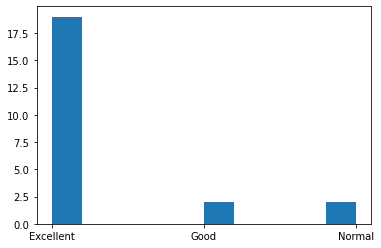

In [ ]:
plt.hist(en_phrase_dt['Rate'])

(array([ 7.,  0.,  0., 37.,  0.,  0.,  8.,  0.,  0.,  2.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

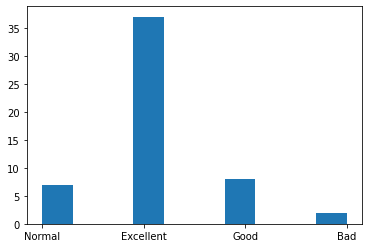

In [ ]:
plt.hist(zh_phrase_dt['Rate'])

In [ ]:
len(zh_phrase_dt[zh_phrase_dt['Rate']=='Bad'])

2

Because the Chinese text is not available here, so we compare the confidence score for each phrase to predict the accuracy of the aws's ability to locate the phrase.
We can see most of the confidence score are very high in both two versions with over 99 percent of score; but Chinese Version has 2 bad predictions of phrases. 

In [ ]:
## Determine Sentiment

we can use Amazon Comprehend to determine the sentiment of a document. We can determine if the sentiment is positive, negative, neutral, or mixed. 

In [ ]:
print('Calling English-Version DetectSentiment')
print(json.dumps(comprehend.detect_sentiment(Text=English_text, LanguageCode='en'), sort_keys=True, indent=4))
print('End of English-Version DetectSentiment\n')

Calling English-Version DetectSentiment
{
    "ResponseMetadata": {
        "HTTPHeaders": {
            "content-length": "164",
            "content-type": "application/x-amz-json-1.1",
            "date": "Thu, 22 Apr 2021 18:13:20 GMT",
            "x-amzn-requestid": "1a63a1f3-5b26-475f-b11b-095029b60397"
        },
        "HTTPStatusCode": 200,
        "RequestId": "1a63a1f3-5b26-475f-b11b-095029b60397",
        "RetryAttempts": 0
    },
    "Sentiment": "POSITIVE",
    "SentimentScore": {
        "Mixed": 0.007249653805047274,
        "Negative": 0.005865304730832577,
        "Neutral": 0.01657288521528244,
        "Positive": 0.9703121781349182
    }
}
End of English-Version DetectSentiment



In [ ]:
print('Calling Chinese-Version DetectSentiment')
print(json.dumps(comprehend.detect_sentiment(Text=Chinese_text, LanguageCode='zh'), sort_keys=True, indent=4))
print('End of Chinese-Version DetectSentiment\n')

Calling Chinese-Version DetectSentiment
{
    "ResponseMetadata": {
        "HTTPHeaders": {
            "content-length": "167",
            "content-type": "application/x-amz-json-1.1",
            "date": "Thu, 22 Apr 2021 18:13:22 GMT",
            "x-amzn-requestid": "75fc0856-e79a-4b28-a74b-6d762b7ddbb6"
        },
        "HTTPStatusCode": 200,
        "RequestId": "75fc0856-e79a-4b28-a74b-6d762b7ddbb6",
        "RetryAttempts": 0
    },
    "Sentiment": "POSITIVE",
    "SentimentScore": {
        "Mixed": 0.00013193536142352968,
        "Negative": 0.0004435907176230103,
        "Neutral": 0.0030926719773560762,
        "Positive": 0.9963317513465881
    }
}
End of Chinese-Version DetectSentiment



Both English version and Chinese version show a positive Sentiment.

In [ ]:
! aws s3 mv  sample1.json s3://contadina-project-xiuyiqian
! aws s3 mv  translated_zh.json s3://contadina-project-xiuyiqian
! aws s3 mv  zh-text.json.json s3://contadina-project-xiuyiqian
! aws s3 mv  en-text.json.json s3://contadina-project-xiuyiqian

move: ./sample1.json to s3://contadina-project-xiuyiqian/sample1.json
move: ./translated_zh.json to s3://contadina-project-xiuyiqian/translated_zh.json


In [ ]:
!jupyter nbconvert --to html project.ipynb

We can also detect entities in a document. An entity is a textual reference to the unique name of a real-world object such as people, places, and commercial items, and to precise references to measures such as dates and quantities.Each entity also has a score that indicates the level of confidence that Amazon Comprehend has that it correctly detected the entity type.

In [ ]:
entities_en_df = pd.DataFrame()
entities_zh_df = pd.DataFrame()

In [ ]:
print('Calling English-version DetectEntities')
entities_en = json.dumps(comprehend.detect_entities(Text=English_text, LanguageCode='en'), sort_keys=True, indent=4)
print(entities_en)
print('End of English-version DetectEntities\n')

Calling English-version DetectEntities
{
    "Entities": [
        {
            "BeginOffset": 23,
            "EndOffset": 29,
            "Score": 0.6094892621040344,
            "Text": "WeChat",
            "Type": "ORGANIZATION"
        },
        {
            "BeginOffset": 126,
            "EndOffset": 136,
            "Score": 0.9447324872016907,
            "Text": "first time",
            "Type": "QUANTITY"
        },
        {
            "BeginOffset": 201,
            "EndOffset": 206,
            "Score": 0.9675905108451843,
            "Text": "first",
            "Type": "QUANTITY"
        },
        {
            "BeginOffset": 262,
            "EndOffset": 267,
            "Score": 0.995296061038971,
            "Text": "China",
            "Type": "LOCATION"
        },
        {
            "BeginOffset": 302,
            "EndOffset": 309,
            "Score": 0.8708974719047546,
            "Text": "Chinese",
            "Type": "OTHER"
        },
        {
     

In [ ]:
with open("en-text.json", "w") as outfile:
    outfile.write(entities_en)
load_en = open('en-text.json')
data_en = json.load(load_en)

In [ ]:
en_text_list = []
en_type_list = []
for entities in data_en['Entities']:
    en_text_list.append(entities['Text'])
    en_type_list.append(entities['Type']) 
entities_en_df['text'] = en_text_list
entities_en_df['type'] = en_type_list

In [ ]:
print('Calling Chinese-version DetectEntities')
entities_zh = json.dumps(comprehend.detect_entities(Text=Chinese_text, LanguageCode='zh'), sort_keys=True, indent=4)
print(entities_zh)
print('End of Chinese-version DetectEntities\n')

Calling Chinese-version DetectEntities
{
    "Entities": [
        {
            "BeginOffset": 41,
            "EndOffset": 44,
            "Score": 0.9956773519515991,
            "Text": "\u7b2c\u4e00\u6b21",
            "Type": "QUANTITY"
        },
        {
            "BeginOffset": 62,
            "EndOffset": 68,
            "Score": 0.9541299939155579,
            "Text": "\u7b2c\u4e00\u4e2a\u62f3\u51fb\u8bfe",
            "Type": "QUANTITY"
        },
        {
            "BeginOffset": 76,
            "EndOffset": 78,
            "Score": 0.995897650718689,
            "Text": "\u4e2d\u56fd",
            "Type": "LOCATION"
        },
        {
            "BeginOffset": 94,
            "EndOffset": 97,
            "Score": 0.7375438213348389,
            "Text": "\u4e2d\u56fd\u4eba",
            "Type": "OTHER"
        },
        {
            "BeginOffset": 109,
            "EndOffset": 111,
            "Score": 0.9631769061088562,
            "Text": "\u6c49\u8bed",
    

In [ ]:
with open("zh-text.json", "w") as outfile:
    outfile.write(entities_zh)
load_zh = open('zh-text.json')
data_zh = json.load(load_zh)

In [ ]:
zh_text_list = []
zh_type_list = []
for entities in data_zh['Entities']:
    zh_text_list.append(entities['Text'])
    zh_type_list.append(entities['Type']) 
entities_zh_df['text'] = zh_text_list
entities_zh_df['type'] = zh_type_list


In [ ]:
entities_en_df

,text,type
0,WeChat,ORGANIZATION
1,first time,QUANTITY
2,first,QUANTITY
3,China,LOCATION
4,Chinese,OTHER
5,Chinese,OTHER
6,Chinese,OTHER
7,grade 12,OTHER


In [ ]:
entities_zh_df

,text,type
0,第一次,QUANTITY
1,第一个拳击课,QUANTITY
2,中国,LOCATION
3,中国人,OTHER
4,汉语,OTHER
5,中文,OTHER
6,一件非常开心的事,QUANTITY
7,个人,QUANTITY
8,12 年级,QUANTITY
9,上次,DATE


Through the comparison, to our surprise, the Chiense version actually has detected more entities--9 entities vs 7 entities-- with even higher accuracy.
The Chinese Comprehension part defined each event as a quantity.

## **Deploying Amazon Translate**

You can either...
- Go to the AWS website and translate any text no longer than 5000 words in length directly on [the website](https://console.aws.amazon.com/translate/home?region=us-east-1#translation).

- Check out [this walkthrough](https://tianqi-bao.s3.amazonaws.com/HW3Q5.html) that introduces some basic uses of AWS Translate and also includes specific procedures which help you get started using AWS CLI.

- Additionally, [here](https://colab.research.google.com/github/camilleoconn/QTM350Contadina/blob/master/Grammar%20Check%20Walk-through.ipynb) is a walkthrough for writing a script to use the Python [LanguageTool](https://predictivehacks.com/languagetool-grammar-and-spell-checker-in-python/) to compare the number of grammar mistakes between native and non-native speakers, as we did in our project.

## **Conclusion**

In order to measure the accuracy of various translations, we employed Amazon Comprehend `detect_key_phrases`.

A "key phrase" generally consists of a noun and associated modifiers. Comprehend assigns a score that determines how confident the program is that it has correctly identified a noun phrase. We decided to group the phrases categorically. 


> Scores > 99%  ||  Excellent
---
> Scores > 90%  ||  Good
---
> Scores > 70%  ||  Normal
---
> Scores < 70%  ||  Bad







Of the 23 samples of writing in a non-native language, we found that the mean score was 98.2% confidence. Of those in the native language, the mean confidene level was 94.8%. 
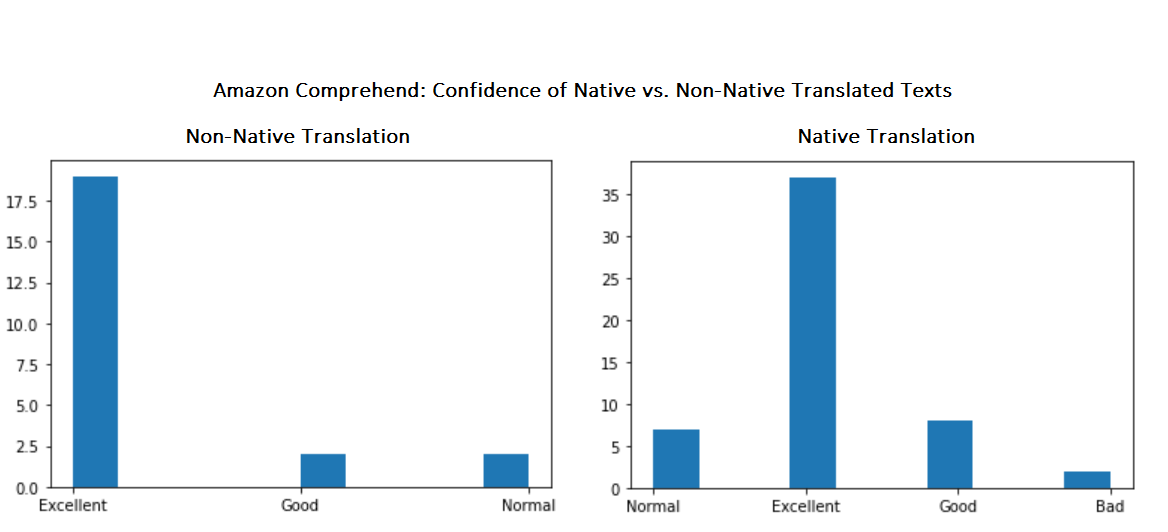

Both groups of writing samples included mostly Excellent phrases, in that Amazon Comprehend is very confident that it correctly identified the key phrase. That said, the native language samples, in Chinese in this case included 2 scores below 70% accuracy, denoted here as "Bad". 

In order to measure whether Amazon Translate and Comprehend together would be enough to identify native or non-native speakers, we tested the statistical significance of these two confidence scores based on key phrases.

In [ ]:
import numpy as np

non_native_mean = .981812
non_native_std = .044021
non_native_sample_size = 23
native_mean = .948488
native_std = .107074
native_sample_size = 54

t_stat = (native_mean - non_native_mean) / (np.sqrt(non_native_std**2/non_native_sample_size + native_std**2/native_sample_size))

print(f'With a critical value of {round(t_stat, 2)}, there is no significant difference between Amazon Comprehend\'s understanding of a native vs. non-native speaker\'s writing patterns.')

With a critical value of -1.94, there is no significant difference between Amazon Comprehend's understanding of a native vs. non-native speaker's writing patterns.


For another comparison, we decided to look to see if there was a major difference in sentiment score between the two sets of writing samples, native and non-native. We found that each score was very positive.